In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('StudentsPerformance.csv')

Step 1: Basic DataFrame Exploration

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values in dataset

In [10]:
df.drop('lunch',axis=1,inplace=True)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


In [12]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

*Data visualization*

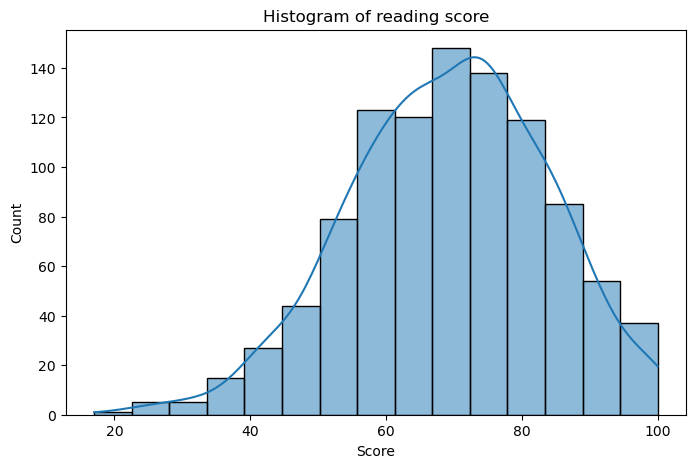

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['reading score'], bins=15, kde=True)
plt.title('Histogram of reading score')
plt.xlabel('Score')
plt.show()

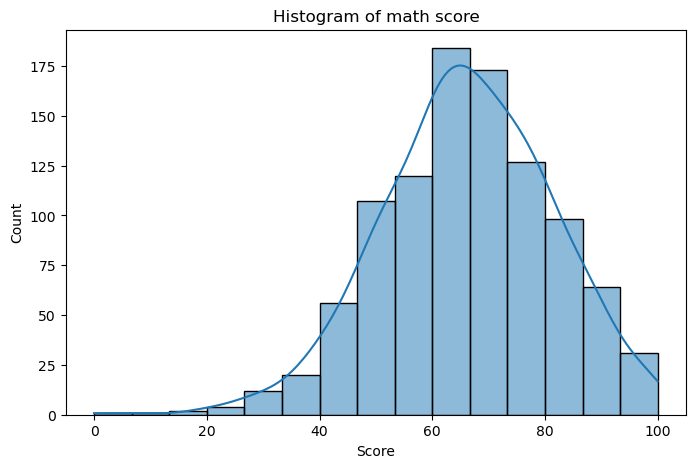

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['math score'], bins=15, kde=True)
plt.title('Histogram of math score')
plt.xlabel('Score')
plt.show()

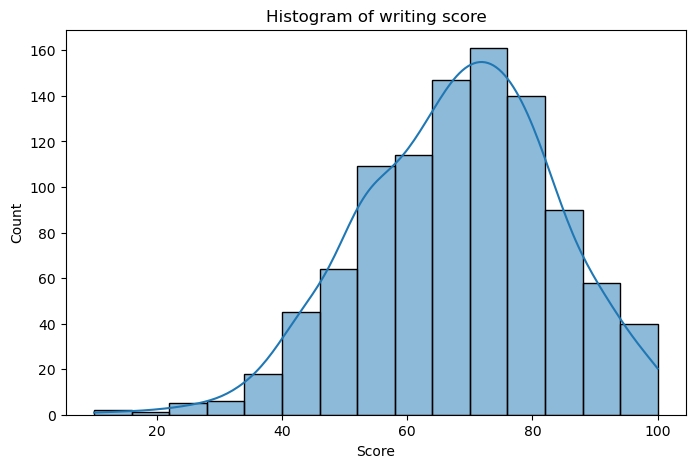

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['writing score'], bins=15, kde=True)
plt.title('Histogram of writing score')
plt.xlabel('Score')
plt.show()

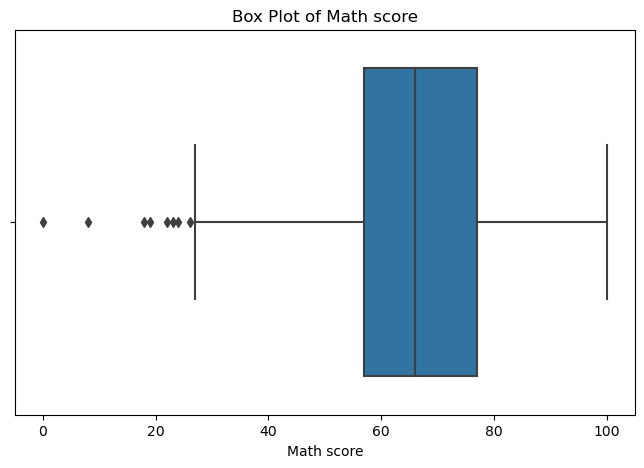

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['math score'])
plt.title('Box Plot of Math score')
plt.xlabel('Math score')
plt.show()

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

C:\Users\ASHVINI\AppData\Local\Temp\ipykernel_18988\443843008.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\ASHVINI\AppData\Local\Temp\ipykernel_18988\443843008.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [18]:
df = df[~((df < lower_bound) | (df> upper_bound)).any(axis=1)]

C:\Users\ASHVINI\AppData\Local\Temp\ipykernel_18988\1261538418.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < lower_bound) | (df> upper_bound)).any(axis=1)]


<Axes: xlabel='math score'>

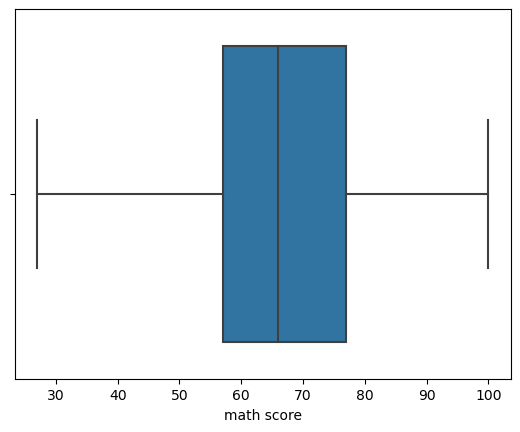

In [19]:
sns.boxplot(x=df['math score'])

<Axes: xlabel='writing score'>

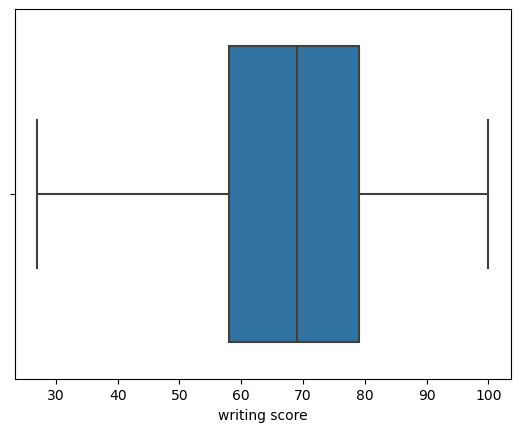

In [20]:
sns.boxplot(x=df['writing score'])

<Axes: xlabel='reading score'>

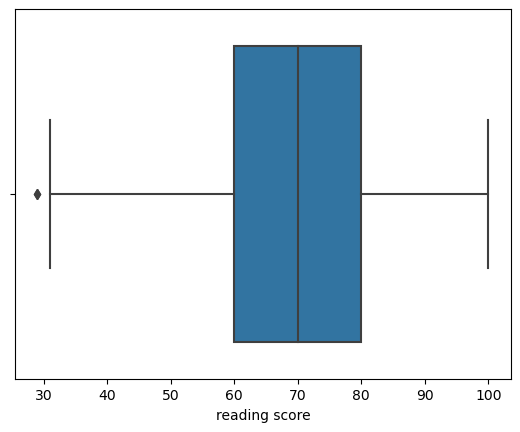

In [21]:
sns.boxplot(x=df['reading score'])

In [22]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,test preparation course
count,988,988,988,988
unique,2,5,6,2
top,female,group C,some college,none
freq,510,316,222,631


In [23]:
df.describe()

,math score,reading score,writing score
count,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802
std,14.409394,14.016760,14.525267
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


*Average score in Maths = 66
 Average score in reading = 69
 Average writing score= 68*

In [24]:
#Variance of math score,reading score,writing score- 

In [25]:
df.var()

C:\Users\ASHVINI\AppData\Local\Temp\ipykernel_18988\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


math score       207.630636
reading score    196.469548
writing score    210.983375
dtype: float64

In [26]:
#Minimum values of following columns
df.min()

gender                                     female
race/ethnicity                            group A
parental level of education    associate's degree
test preparation course                 completed
math score                                     27
reading score                                  29
writing score                                  27
dtype: object

In [27]:
#Maximum valuesof following columns
df.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
test preparation course                    none
math score                                  100
reading score                               100
writing score                               100
dtype: object

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75


In [29]:
df.drop(['parental level of education','math score','reading score','writing score'],axis=1,inplace=True)

C:\Users\ASHVINI\AppData\Local\Temp\ipykernel_18988\2757582464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['parental level of education','math score','reading score','writing score'],axis=1,inplace=True)


In [30]:
df.head()

,gender,race/ethnicity,test preparation course
0,female,group B,none
1,female,group C,completed
2,female,group B,none
3,male,group A,none
4,male,group C,none


In [32]:
gender1=pd.get_dummies(df['gender'],drop_first=True)

In [34]:
df=pd.concat([df,gender1],axis=1)

In [38]:
df.head()

,race/ethnicity,test preparation course,male
0,group B,none,0
1,group C,completed,0
2,group B,none,0
3,group A,none,1
4,group C,none,1


In [36]:
df.drop(['gender',],axis=1,inplace=True)

In [41]:
ethni=pd.get_dummies(df['race/ethnicity'],drop_first=True)

In [43]:
df.head()

,race/ethnicity,test preparation course,male
0,group B,none,0
1,group C,completed,0
2,group B,none,0
3,group A,none,1
4,group C,none,1


In [ ]:
pd.get_dummies(df[''],drop_first=True)

In [44]:
df=pd.concat([df,ethni],axis=1)

In [45]:
df.head()

,race/ethnicity,test preparation course,male,group B,group C,group D,group E
0,group B,none,0,1,0,0,0
1,group C,completed,0,0,1,0,0
2,group B,none,0,1,0,0,0
3,group A,none,1,0,0,0,0
4,group C,none,1,0,1,0,0


In [37]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
X=final.drop('test preparation course')